In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("RFMiD2_0\Training_set\RFMiD_2_Training_labels.csv", encoding="latin")

In [3]:
data.drop(columns="Unnamed: 52", inplace=True)
data.rename(columns={'ON\xa0':'ON'}, inplace=True)

In [4]:
list(data.columns)

['ID',
 'WNL',
 'AH',
 'AION',
 'ARMD',
 'BRVO',
 'CB',
 'CF',
 'CL',
 'CME',
 'CNV',
 'CRAO',
 'CRS',
 'CRVO',
 'CSR',
 'CWS',
 'CSC',
 'DN',
 'DR',
 'EDN',
 'ERM',
 'GRT',
 'HPED',
 'HR',
 'LS',
 'MCA',
 'ME',
 'MH',
 'MHL',
 'MS',
 'MYA',
 'ODC',
 'ODE',
 'ODP',
 'ON',
 'OPDM',
 'PRH',
 'RD',
 'RHL',
 'RTR',
 'RP',
 'RPEC',
 'RS',
 'RT',
 'SOFE',
 'ST',
 'TD',
 'TSLN',
 'TV',
 'VS',
 'HTN',
 'IIH']

In [5]:
data.isna().sum()

ID      0
WNL     0
AH      0
AION    0
ARMD    0
BRVO    0
CB      0
CF      0
CL      0
CME     0
CNV     0
CRAO    0
CRS     0
CRVO    0
CSR     0
CWS     0
CSC     0
DN      0
DR      0
EDN     0
ERM     0
GRT     0
HPED    0
HR      0
LS      0
MCA     0
ME      0
MH      0
MHL     0
MS      0
MYA     0
ODC     0
ODE     0
ODP     0
ON      0
OPDM    0
PRH     0
RD      0
RHL     0
RTR     0
RP      0
RPEC    0
RS      0
RT      0
SOFE    0
ST      0
TD      0
TSLN    0
TV      0
VS      0
HTN     0
IIH     0
dtype: int64

<AxesSubplot:>

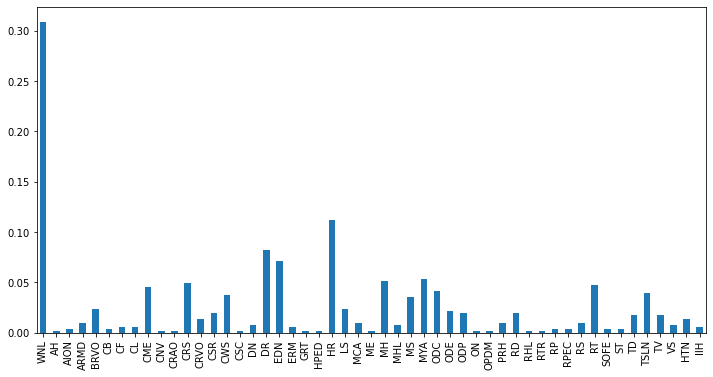

In [6]:
data.drop(columns="ID").mean().plot(kind="bar",figsize=(12,6))

In [7]:
data

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,794,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,795,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,796,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,797,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from PIL import Image
import os
def jpg_to_png(df,src,dest):
    for i in df.iterrows():
        dat=i[1]
        if os.path.exists(src+str(dat["ID"])+".jpg"):
            img=Image.open(src+str(dat["ID"])+".jpg")
            img.save(dest+str(dat["ID"])+".png")
            print("done")
        elif os.path.exists(src+str(dat["ID"])+".JPG"):
            img=Image.open(src+str(dat["ID"])+".JPG")
            img.save(dest+str(dat["ID"])+".png")
            print("done2")
    

In [13]:
def verify(path, file, data):
    ls=os.listdir(path)
    # ls.remove(file)
#     ls.remove("2")
    print(len(ls))
    ls=[i.split(".")[0] for i in ls if i.split(".")[0].isnumeric()]
    ls=[int(i) for i in ls]
    print(set(data.ID.tolist()).difference(set(ls)))
    print(set(ls).difference(set(data.ID.tolist())))
    return list(set(data.ID.tolist()).difference(set(ls)))

In [15]:
ls=verify("RFMiD2_0\Training_set\\3.2\\","RFMiD_2_Training_labels.csv",data)

450
{50, 53, 568, 569, 570, 571, 572, 573, 574, 64, 579, 580, 581, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 87, 599, 89, 600, 601, 602, 603, 604, 605, 606, 607, 608, 99, 100, 609, 610, 611, 612, 105, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 763}
set()


In [19]:
data=data.query("ID not in @ls")
d=data.sum()
d=d[d==0].index.to_list()

In [20]:
d

['DR', 'HTN', 'IIH']

In [22]:
data[data["WNL"]==0]

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,515,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,518,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
310,529,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
data.to_csv("RFMiD2_0\Training_set\imputable_train_split.csv",index=False,encoding="utf8")

In [24]:
valdata=pd.read_csv("RFMiD2_0\Validation_set\RFMiD_2_Validation_labels.csv", encoding="latin")

In [25]:
verify("RFMiD2_0\Validation_set\\","RFMiD_2_Validation_labels.csv",valdata)

181
{191}
{2, 3}


[191]

In [67]:
valdata.drop(columns="Unnamed: 52", inplace=True)
valdata.rename(columns={'ON\xa0':'ON'}, inplace=True)

In [68]:
valdata=valdata[valdata["ID"]!=191]

In [69]:
valdata.to_csv("RFMiD2_0\Validation_set\Cleaned_validation_split.csv",encoding="utf8",index=False)

In [70]:
testdata=pd.read_csv("RFMiD2_0\Test_set\RFMiD_2_Testing_labels.csv", encoding="latin")

In [71]:
verify("RFMiD2_0\Test_set\\","RFMiD_2_Testing_labels.csv",testdata)

179
{490, 405, 151}
{2, 291, 3, 489, 404, 251}


In [102]:
testdata.drop(columns="Unnamed: 52", inplace=True)
testdata.rename(columns={'ON\xa0':'ON'}, inplace=True)

In [103]:
testdata=testdata[testdata["ID"]!=490]
testdata=testdata[testdata["ID"]!=405]
testdata=testdata[testdata["ID"]!=151]
testdata

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,191,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,201,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,216,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,896,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,897,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,898,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,899,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
testdata.to_csv("RFMiD2_0\Test_set\Cleand_test_data.csv",encoding="utf8",index=False)

In [105]:
set(data.ID.tolist()).intersection(set(testdata.ID.tolist()))

{216}

In [75]:
jpg_to_png(data,"RFMiD2_0\Training_set\\","RFMiD2_0\Training_set\\2\\")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


KeyboardInterrupt: 

In [106]:
jpg_to_png(testdata,"RFMiD2_0\Test_set\\","RFMiD2_0\Test_set\\2\\")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


KeyboardInterrupt: 

In [3]:
testdata=pd.read_csv("RFMiD2_0\Test_set\Cleand_test_data.csv")
testdata

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,191,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,201,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,216,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,896,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,897,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,898,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,899,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
valdata=pd.read_csv("RFMiD2_0\Validation_set\Cleaned_validation_split.csv")
valdata

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,845,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,846,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,848,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
traindata=pd.read_csv("RFMiD2_0\Training_set\Cleaned_train_split.csv")
traindata

,ID,WNL,AH,AION,ARMD,BRVO,CB,CF,CL,CME,...,RS,RT,SOFE,ST,TD,TSLN,TV,VS,HTN,IIH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,794,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,795,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
506,796,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
507,797,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

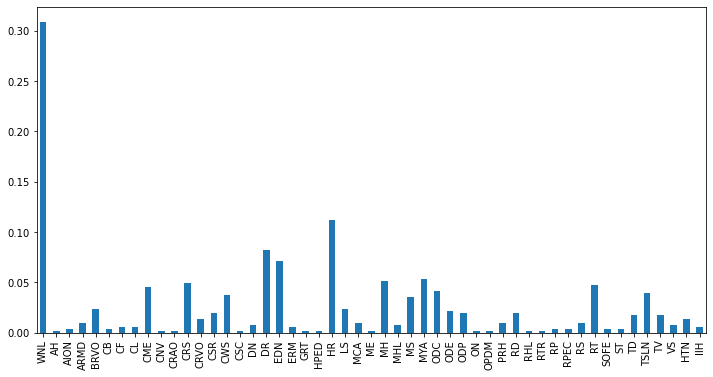

In [6]:
traindata.drop(columns="ID").mean().plot(kind="bar",figsize=(12,6))

<AxesSubplot:>

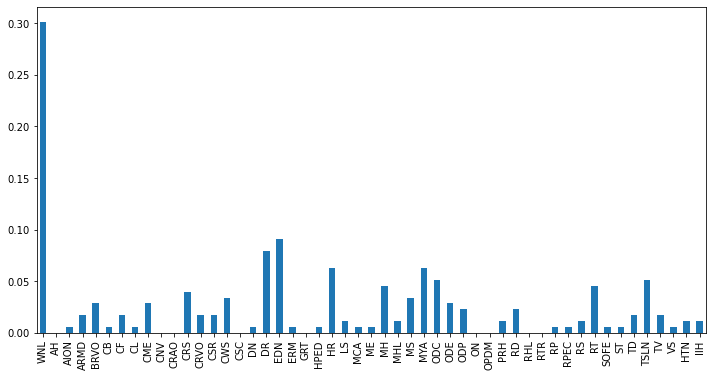

In [7]:
valdata.drop(columns="ID").mean().plot(kind="bar",figsize=(12,6))

<AxesSubplot:>

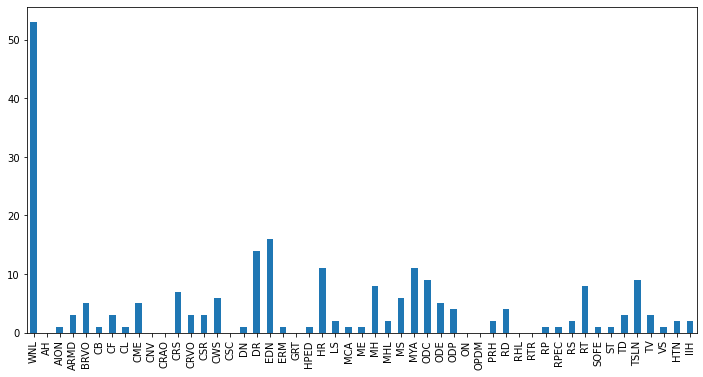

In [112]:
valdata.drop(columns="ID").sum().plot(kind="bar",figsize=(12,6))

<AxesSubplot:>

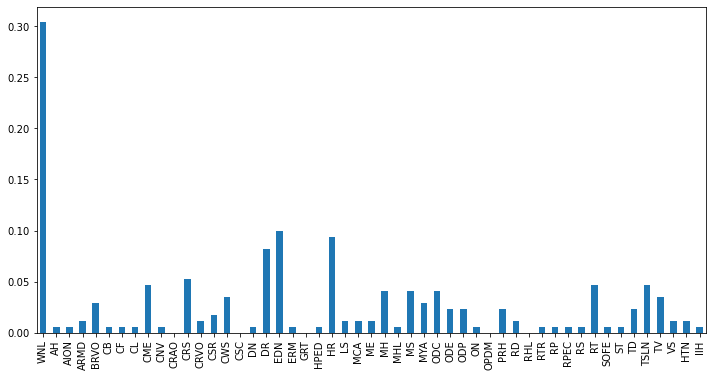

In [8]:
testdata.drop(columns="ID").mean().plot(kind="bar",figsize=(12,6))

In [9]:
jpg_to_png(valdata,"RFMiD2_0\Validation_set\\","RFMiD2_0\Validation_set\\2\\")

NameError: name 'jpg_to_png' is not defined

In [10]:
df=pd.read_csv("RFMiD2_0/Training_set/Cleaned_augmented_7.csv")

In [11]:
df

,ID,WNL,ARMD,BRVO,CME,CRS,CRVO,CSR,CWS,DN,...,MH,MS,MYA,ODC,ODE,ODP,RS,RT,TSLN,RareDisease
0,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,21916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2124,21917,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2125,21918,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2126,21919,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Rarecases=set(valdata.columns).difference(set(df.columns))

In [13]:
len(Rarecases)

29

In [14]:
Rarecases=list(Rarecases)

In [15]:
index=valdata[valdata[Rarecases].any(1)].index

In [16]:
valdata["RareDisease"]=valdata[Rarecases].sum(axis=1)

In [17]:
valdata["RareDisease"]=valdata["RareDisease"].apply(lambda x: 1 if x>0 else 0)

In [18]:
valdata.drop(columns=Rarecases,inplace=True)

In [19]:
overlap=valdata[valdata['RareDisease']==1].drop(columns=["RareDisease","ID"]).sum()
overlap=list(overlap[overlap>0].index)
overlap

['CME', 'CRS', 'CWS', 'EDN', 'HR', 'MH', 'MS', 'MYA', 'ODE', 'RT', 'TSLN']

In [20]:
valdata[(valdata["RareDisease"]==1 ) & (valdata[overlap].any(1))].sum()

ID             4091
WNL               0
ARMD              0
BRVO              0
CME               1
CRS               2
CRVO              0
CSR               0
CWS               1
DN                0
DR                0
EDN               2
HR                1
LS                0
MH                1
MS                1
MYA               1
ODC               0
ODE               1
ODP               0
RS                0
RT                3
TSLN              4
RareDisease      12
dtype: int64

In [21]:
ommit=valdata[(valdata["RareDisease"]==1 ) & (valdata[overlap].any(1))][overlap].index.tolist()

valdata.drop(ommit, inplace=True)

valdata[(valdata["RareDisease"]==1)].sum()

ID             8077
WNL               0
ARMD              0
BRVO              0
CME               0
CRS               0
CRVO              0
CSR               0
CWS               0
DN                0
DR                0
EDN               0
HR                0
LS                0
MH                0
MS                0
MYA               0
ODC               0
ODE               0
ODP               0
RS                0
RT                0
TSLN              0
RareDisease      20
dtype: int64

In [22]:
valdata

,ID,WNL,ARMD,BRVO,CME,CRS,CRVO,CSR,CWS,DN,...,MH,MS,MYA,ODC,ODE,ODP,RS,RT,TSLN,RareDisease
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,120,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,131,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,845,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,846,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174,848,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
valdata.to_csv("RFMiD2_0\Validation_set\Cleaned_validation_split_final.csv",index=False)

In [24]:
Rarecases

['MHL',
 'SOFE',
 'RTR',
 'ST',
 'TV',
 'IIH',
 'VS',
 'ME',
 'CF',
 'HPED',
 'ON',
 'RHL',
 'MCA',
 'AH',
 'RD',
 'TD',
 'ERM',
 'AION',
 'RPEC',
 'CSC',
 'RP',
 'HTN',
 'OPDM',
 'CNV',
 'CL',
 'CRAO',
 'GRT',
 'CB',
 'PRH']

In [25]:
testdata["RareDisease"]=testdata[Rarecases].sum(axis=1)
testdata["RareDisease"]=testdata["RareDisease"].apply(lambda x: 1 if x>0 else 0)
testdata.drop(columns=Rarecases,inplace=True)
overlap=testdata[testdata['RareDisease']==1].drop(columns=["RareDisease","ID"]).sum()
overlap=list(overlap[overlap>0].index)
overlap

['CME',
 'CRS',
 'CWS',
 'EDN',
 'HR',
 'LS',
 'MH',
 'MS',
 'MYA',
 'ODE',
 'ODP',
 'RT',
 'TSLN']

In [26]:
ommit=testdata[(testdata["RareDisease"]==1 ) & (testdata[overlap].any(1))][overlap].index.tolist()

testdata.drop(ommit, inplace=True)

testdata[testdata["RareDisease"]==1].sum()

ID             8718
WNL               0
ARMD              0
BRVO              0
CME               0
CRS               0
CRVO              0
CSR               0
CWS               0
DN                0
DR                0
EDN               0
HR                0
LS                0
MH                0
MS                0
MYA               0
ODC               0
ODE               0
ODP               0
RS                0
RT                0
TSLN              0
RareDisease      19
dtype: int64

In [27]:
testdata

,ID,WNL,ARMD,BRVO,CME,CRS,CRVO,CSR,CWS,DN,...,MH,MS,MYA,ODC,ODE,ODP,RS,RT,TSLN,RareDisease
1,189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,201,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,216,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,220,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,896,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,897,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,898,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169,899,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
testdata.to_csv("RFMiD2_0\Test_set\Cleand_test_data_final.csv",index=False)

<AxesSubplot:>

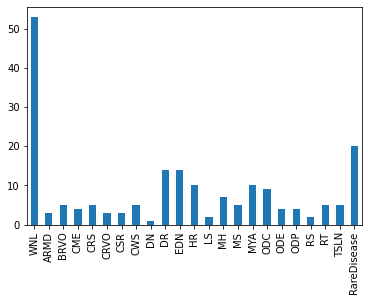

In [29]:
valdata.drop(columns="ID").sum().plot(kind="bar")

<AxesSubplot:>

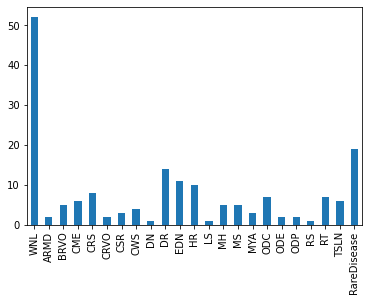

In [30]:
testdata.drop(columns="ID").sum().plot(kind="bar")